## Standardization


Standardization involves centering the variable at zero, and standardizing the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

In [2]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Information about the boston house prince dataset
# you will find details about the different variables

# the aim is to predict the "Median value of the houses"
# MEDV column in this dataset

# and there are variables with characteristics about
# the homes and the neighborhoods

# print the dataset description
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)

# transform train and test sets
data_scaled = scaler.transform(data)

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01, 2.25328063e+01])

In [7]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
       1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
       8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
       7.13400164e+00, 9.18801155e+00])

In [18]:
# let's transform the returned NumPy arrays to dataframes

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

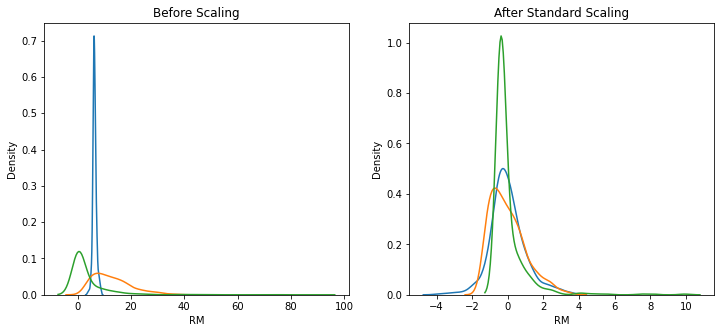

In [20]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(data['RM'], ax=ax1)
sns.kdeplot(data['LSTAT'], ax=ax1)
sns.kdeplot(data['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(data_scaled['RM'], ax=ax2)
sns.kdeplot(data_scaled['LSTAT'], ax=ax2)
sns.kdeplot(data_scaled['CRIM'], ax=ax2)
plt.show()

Note from the above plots how standardisation centered all the distributions at zero, but it preserved their original distribution. The value range is not identical, but it looks more homogeneous across the variables. 

Note something interesting in the following plot: 

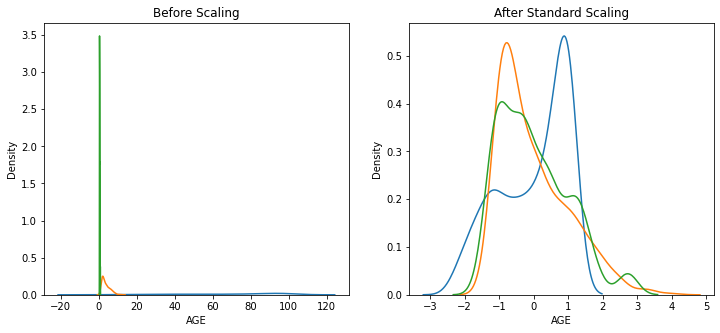

In [25]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(data['AGE'], ax=ax1, legend=True)
sns.kdeplot(data['DIS'], ax=ax1)
sns.kdeplot(data['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(data_scaled['AGE'], ax=ax2)
sns.kdeplot(data_scaled['DIS'], ax=ax2)
sns.kdeplot(data_scaled['NOX'], ax=ax2)
plt.show()

## Scaling to Minimum and Maximum values - MinMaxScaling

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the value range:

X_scaled = (X - X.min / (X.max - X.min)

In [26]:
import pandas as pd

# dataset for the demo
from sklearn.datasets import load_boston

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [27]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)

# transform train and test sets
data_scaled = scaler.transform(data)

In [29]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ,  50.    ])

In [30]:
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

array([-7.10352762e-05,  0.00000000e+00, -1.68621701e-02,  0.00000000e+00,
       -7.92181070e-01, -6.82314620e-01, -2.98661174e-02, -1.02719857e-01,
       -4.34782609e-02, -3.56870229e-01, -1.34042553e+00, -8.06898986e-04,
       -4.77373068e-02, -1.11111111e-01])

In [31]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.219000e+00, 9.710000e+01, 1.099690e+01,
       2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
       3.624000e+01, 4.500000e+01])

In [32]:
# let's transform the returned NumPy arrays to dataframes

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

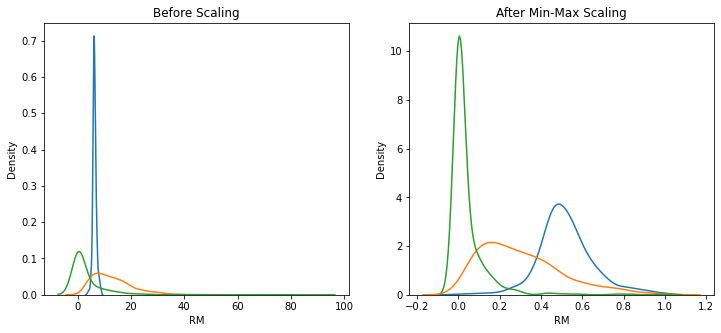

In [34]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(data['RM'], ax=ax1)
sns.kdeplot(data['LSTAT'], ax=ax1)
sns.kdeplot(data['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(data_scaled['RM'], ax=ax2)
sns.kdeplot(data_scaled['LSTAT'], ax=ax2)
sns.kdeplot(data_scaled['CRIM'], ax=ax2)
plt.show()

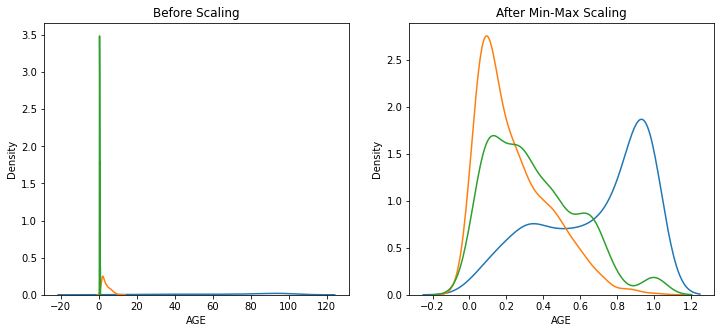

In [35]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(data['AGE'], ax=ax1)
sns.kdeplot(data['DIS'], ax=ax1)
sns.kdeplot(data['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(data_scaled['AGE'], ax=ax2)
sns.kdeplot(data_scaled['DIS'], ax=ax2)
sns.kdeplot(data_scaled['NOX'], ax=ax2)
plt.show()

## Scaling to quantiles and median - RobustScaling

In this procedure the median is removed from the observations and then they are scaled to the inter-quantile range (IQR). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

In [36]:
import pandas as pd

# dataset for the demo
from sklearn.datasets import load_boston

# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)

# transform train and test sets
data_scaled = scaler.transform(data)

In [37]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)

# transform train and test sets
data_scaled = scaler.transform(data)

In [39]:
# the scaler stores the median values of the features as learned from train set
scaler.center_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20850e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [40]:
# the scaler stores the IQR values of the features as learned from train set

scaler.scale_

array([3.5950375e+00, 1.2500000e+01, 1.2910000e+01, 1.0000000e+00,
       1.7500000e-01, 7.3800000e-01, 4.9050000e+01, 3.0882500e+00,
       2.0000000e+01, 3.8700000e+02, 2.8000000e+00, 2.0847500e+01,
       1.0005000e+01, 7.9750000e+00])

In [41]:
# let's transform the returned NumPy arrays to dataframes

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

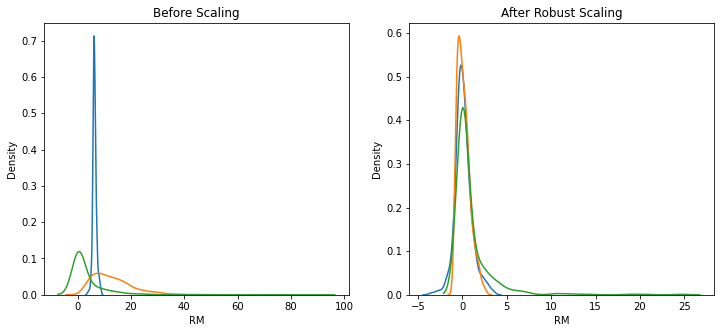

In [43]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(data['RM'], ax=ax1)
sns.kdeplot(data['LSTAT'], ax=ax1)
sns.kdeplot(data['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(data_scaled['RM'], ax=ax2)
sns.kdeplot(data_scaled['LSTAT'], ax=ax2)
sns.kdeplot(data_scaled['CRIM'], ax=ax2)
plt.show()

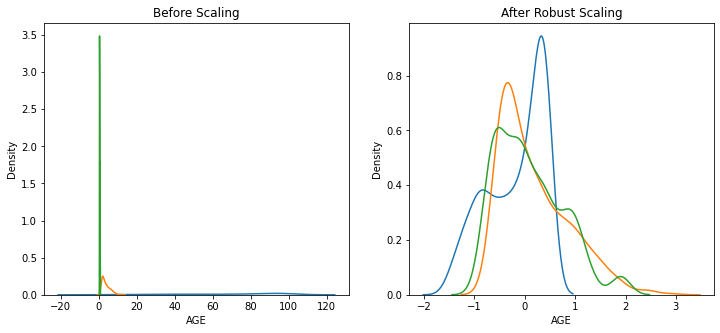

In [44]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(data['AGE'], ax=ax1)
sns.kdeplot(data['DIS'], ax=ax1)
sns.kdeplot(data['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(data_scaled['AGE'], ax=ax2)
sns.kdeplot(data_scaled['DIS'], ax=ax2)
sns.kdeplot(data_scaled['NOX'], ax=ax2)
plt.show()

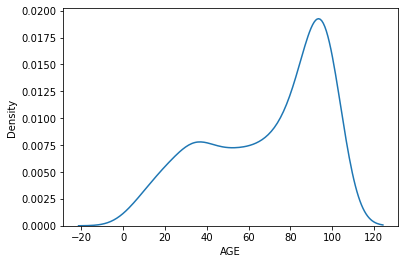

In [45]:
sns.kdeplot(data['AGE'])
plt.show()